In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import json, requests
from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from matplotlib import ticker 
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [25]:
conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


In [26]:
conf_df = conf_df.drop(["Lat","Long","Province/State"],axis =1)
conf_df = conf_df.replace(np.nan, '', regex=True)
conf_df.head(10)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,41334,41425,41501,41633,41728,41814,41935,41975,42033,42159,42297,42463,42609,42795,42969,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20634,20875,21202,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,57651,57942,58272,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4665,4756,4825,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10558,10805,11035,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,128,128,128,128,130,130,130,131,131,131,131,131,131,133,134,134,134,134,139,139,139,139,139,139,139,140,141,141,141,141,141,142,144,144,144,144,144,146,146
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1157179,1166924,1173533,1183131,1195276,1205928,1217028,1228814,1236851,1242182,1250499,1262476,1273356,1284519,1296378,1304846,1310491,1318384,1329005,1339337,1349434,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807,1424533,1432570,1440103,1447732,1454631,1459832,1463110,1466309,1469919
7,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,87432,89813,92254,93448,94776,97150,99563,101773,104249,106424,107466,108687,110548,112680,114383,115855,117337,117886,118870,120459,121979,123646,124839,126224,126709,127522,129085,130870,132346,133594,134768,135124,135967,137231,138508,139692,140959,141937,142344,142928
8,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,115,115,115,115,115,115,115,115,115,116,117,117,117,117,117,117,117,117,117,117,117,117
9,Australia,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4421,4425,4432,4435,4443,4445,4454,4459,4462,4469,4469,4469,4469,4469,4469,4486,4498,4502,4509,4514,4517,4527,4538,4542,4548,4552,4552,4556,4564,4568,4577,4582,4588,4597,4603,4605,4610,4614,4620,4622


In [27]:
death_df = death_df.drop(["Lat","Long","Province/State"],axis =1)
death_df = death_df.replace(np.nan, '', regex=True)
death_df.head(20)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1535,1538,1538,1544,1547,1551,1557,1557,1559,1565,1577,1580,1584,1594,1598,1608,1620,1635,1641,1648,1653,1666,1678,1690,1702,1715,1728,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864,1874,1900,1906
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,502,509,518,527,532,536,543,549,557,559,571,579,590,598,605,612,623,631,637,646,657,672,685,699,716,735,743,753,771,787,798,810,822,839,852,870,889,905,922,936
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1956,1964,1973,1980,1980,1999,2011,2024,2036,2048,2062,2077,2093,2111,2124,2139,2154,2168,2186,2206,2224,2236,2255,2272,2294,2309,2329,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501,2516,2527,2539
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,77,77,78,78,78,78
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,279,284,286,289,291,296,299,300,303,307,308,308,312,315,317,322,322,324,328,332,333,334,336,337,337,338,340,341,342,345,346,348,350,351,352,353,354,354,354,355
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
6,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30792,31002,31140,31623,32052,32520,32766,33136,33348,33560,33907,34183,34531,34782,35045,35307,35436,35727,36106,36347,36532,36790,36902,37002,37122,37432,37714,37941,38216,38322,38473,38730,38928,39156,39305,39512,39632,39770,39888,40009
7,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1300,1341,1363,1391,1413,1448,1476,1506,1533,1559,1580,1609,1636,1668,1697,1738,1763,1788,1811,1839,1870,1900,1931,1952,1976,2002,2040,2068,2090,2121,2142,2164,2193,2228,2254,2277,2309,2326,2344,2372
8,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
9,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53


## Global Confirmed Cases Prediction

In [28]:
import tensorflow as tf

Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(80,name = "Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "LRelu_l4")(Dense_l4)

Dense_l5 = Dense(1,name="Dense_l5")(LRelu_l4)
LRelu_l5 = LeakyReLU(name = "Output")(Dense_l5)

confirmed_cases_model = models.Model(inputs=Visible, outputs=LRelu_l5)
confirmed_cases_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='mean_squared_error',metrics=['accuracy'])
confirmed_cases_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)               

In [29]:
Y_data = np.log10(np.asarray(conf_df.iloc[:,5:].sum(axis =0)).astype("float32"))
X_data = np.arange(1,len(Y_data)+1)

In [30]:
epochs = 1000
confirmed_cases_model.fit(X_data.reshape([Y_data.shape[0],1]),Y_data.reshape([Y_data.shape[0],1]),epochs=epochs)

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 54.9435 - accuracy: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 15.4044 - accuracy: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 8.8403 - accuracy: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.9718 - accuracy: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.7461 - accuracy: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 6.2203 - accuracy: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 1ms/step - loss: 5.8595 - accuracy: 0.0000e+00
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.4658 - accuracy: 0.0000e+00
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 5.2775 - accuracy: 0.0000e+00
Epoch 10/1000
10/10 [==============================] - 0s 1ms/

In [31]:
confirmed_cases_model.save('confirmed_cases_model.h5')

#### Loading Model

In [11]:
# !wget https://github.com/deekshaarora05/COVID-19_prediction/blob/main/confirmed_cases_model.h5

--2020-12-09 18:09:32--  https://github.com/deekshaarora05/COVID-19_prediction/blob/main/confirmed_cases_model.h5
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘confirmed_cases_model.h5’

confirmed_cases_mod     [ <=>                ]  93.47K  --.-KB/s    in 0.08s   

2020-12-09 18:09:32 (1.17 MB/s) - ‘confirmed_cases_model.h5’ saved [95709]



In [32]:
confirmed_cases_model = models.load_model("confirmed_cases_model.h5")
confirmed_cases_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)               

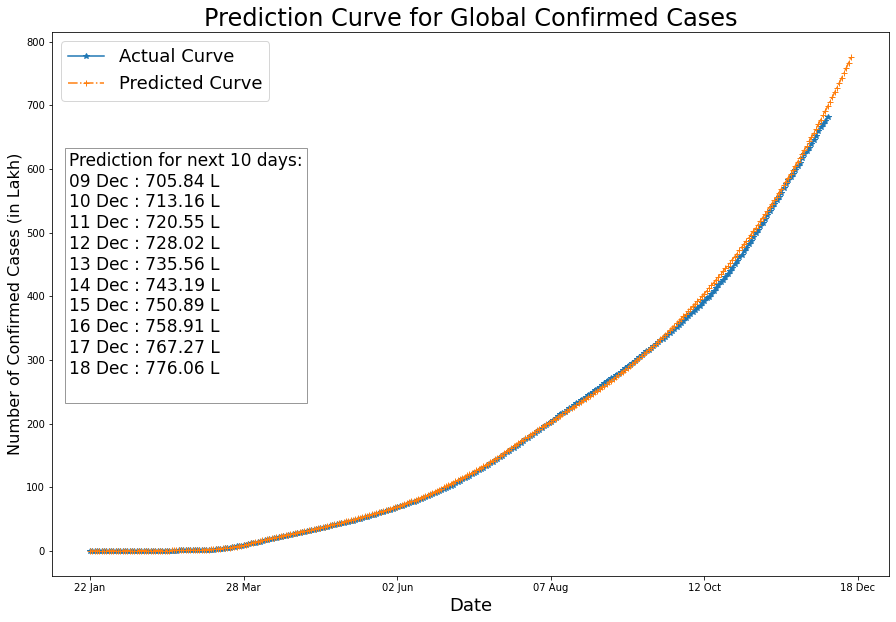

In [45]:
pred_for_days = 10
case_nums_country = conf_df.groupby("Country/Region").sum().apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]
tmp_df = conf_df.iloc[:,5:].sum(axis =0)
data = np.power(10,confirmed_cases_model.predict(np.arange(1,len(tmp_df)+pred_for_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
date = np.arange(0,len(tmp_df))
plt.plot(date,tmp_df/100000,"-",label="Actual Curve", marker='*')
date = np.arange(0,len(data))
plt.plot(date,data/100000,"-.",label="Predicted Curve",marker='+')
nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,pred_for_days+1)]
total = d + nextdays
text = "Prediction for next "+str(pred_for_days) +" days:\n"
for i in range(pred_for_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(pred_for_days-i)],-3)[0]/100000)+" L\n"
plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),d[:-1:int(len(total)/5)]+[total[-1]])
plt.xlabel("Date",fontsize =18)
plt.title("Prediction Curve for Global Confirmed Cases",{'fontsize':24})
plt.ylabel("Number of Confirmed Cases (in Lakh)",fontsize =16)
plt.legend(fontsize =18) 
plt.show()

## Global Deaths Prediction

In [34]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(80,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)

Dense_l2 = Dense(80,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)

Dense_l3 = Dense(80,name = "Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "LRelu_l3")(Dense_l3)

Dense_l4 = Dense(80,name="Dense_l4")(LRelu_l3)
LRelu_l4 = LeakyReLU(name = "LRelu_l4")(Dense_l4)

Dense_l5 = Dense(1,name="Dense_l5")(LRelu_l4)
LRelu_l5 = LeakyReLU(name = "Output")(Dense_l5)

global_deaths_model = models.Model(inputs=Visible, outputs=LRelu_l5)
global_deaths_model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error',metrics=['accuracy'])
global_deaths_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)               

In [35]:
data1_y = np.log10(np.asarray(death_df.iloc[:,5:].sum(axis =0)).astype("float32"))
data1_x = np.arange(1,len(data1_y)+1)

In [36]:
epochs=1000
global_deaths_model.fit(data1_x.reshape([data1_y.shape[0],1]),data1_y.reshape([data1_y.shape[0],1]),epochs=epochs)

Epoch 1/1000
10/10 [==============================] - 0s 2ms/step - loss: 51.0901 - accuracy: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 16.5378 - accuracy: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 8.3570 - accuracy: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 5.0378 - accuracy: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.2573 - accuracy: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 4.0781 - accuracy: 0.0000e+00
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.6217 - accuracy: 0.0000e+00
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 3.4338 - accuracy: 0.0000e+00
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.2908 - accuracy: 0.0000e+00
Epoch 10/1000
10/10 [==============================] - 0s 1ms/

In [37]:
global_deaths_model.save('global_deaths_model.h5')

#### Loading Model

In [ ]:
# !wget https://github.com/deekshaarora05/COVID-19_prediction/blob/main/global_deaths_model.h5

In [38]:
global_deaths_model = models.load_model("global_deaths_model.h5")
global_deaths_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 80)                160       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 80)                0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 80)                6480      
_________________________________________________________________
LRelu_l3 (LeakyReLU)         (None, 80)               

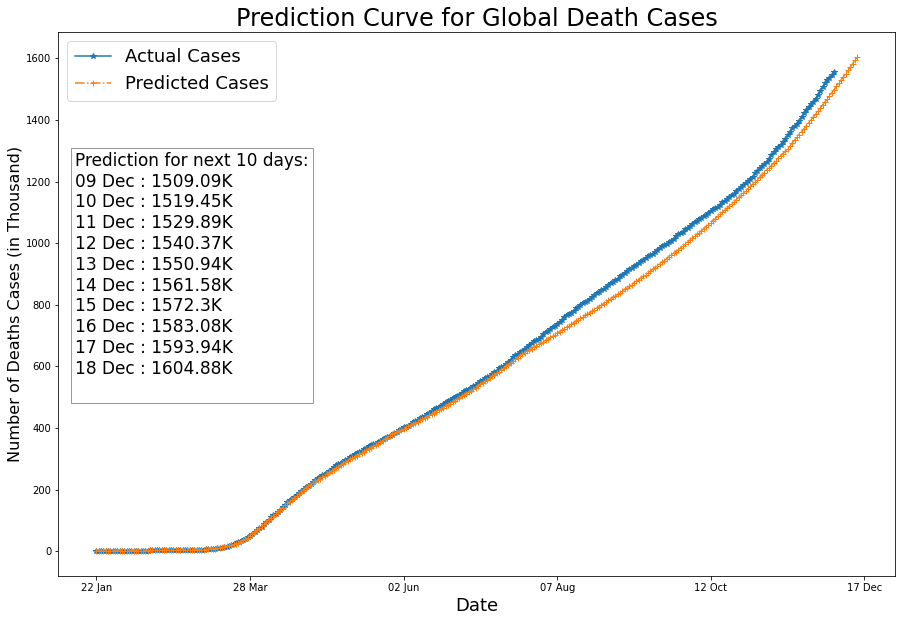

In [46]:
pred_for_days = 10
tmp_df = death_df.iloc[:,5:].sum(axis =0)
data = np.power(10,global_deaths_model.predict(np.arange(1,len(tmp_df)+pred_for_days+1)))
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
date = np.arange(0,len(tmp_df))
plt.plot(date,tmp_df/1000,"-", label="Actual Cases",marker='*')
date = np.arange(0,len(data))
plt.plot(date,data/1000,"-.",label="Predicted Cases",marker='+')
nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,pred_for_days+1)]
total =d+nextdays
text = "Prediction for next "+str(pred_for_days) +" days:\n"
for i in range(pred_for_days):
    text += nextdays[i]+" : "+str(np.round(data[-1*(pred_for_days-i)],-1)[0]/1000)+"K\n"
plt.text(0.02, 0.78, text, fontsize=17, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])
plt.title("Prediction Curve for Global Death Cases",{'fontsize':24})
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Deaths Cases (in Thousand)",fontsize =16)
plt.legend(fontsize =18)
plt.show()

## Tabulation for prediction and actual cases after July 1,2020-Global

In [41]:
start_date = "7/1/20" 
pred_days=(datetime.strptime(start_date,'%m/%d/%y') - datetime.strptime("1/22/20",'%m/%d/%y')).days
nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,pred_for_days+1)]
total =d+nextdays
data_confirmed = np.power(10,confirmed_cases_model.predict(np.arange(1,len(Y_data)+pred_for_days+1)))
data_deaths = np.power(10,global_deaths_model.predict(np.arange(1,len(Y_data)+pred_for_days+1)))
tabulation= pd.DataFrame([total[pred_days:],list(np.int64(np.round(data_confirmed[pred_days:].reshape(-1)/100000,2)*100000)),list(conf_df.iloc[:,5:].sum(axis =0)[pred_days:]),list(np.int64(np.round(data_deaths[pred_days:].reshape(-1)/1000,2)*1000)),
             list(death_df.iloc[:,5:].sum(axis =0)[pred_days:])],["Date","Confirmed(Predicted)","Confirmed(Actual)","Deaths(Predicted)","Deaths(Actual)"]).transpose().set_index("Date")
tabulation.tail(15)

,Confirmed(Predicted),Confirmed(Actual),Deaths(Predicted),Deaths(Actual)
Date,,,,
04 Dec,69861000,68225587,1498820,1556834
05 Dec,70584000,None,1509090,None
06 Dec,71316000,None,1519450,None
07 Dec,72055000,None,1529890,None
08 Dec,72802000,None,1540370,None
09 Dec,73556000,None,1550940,None
10 Dec,74319000,None,1561580,None
11 Dec,75089000,None,1572300,None
12 Dec,75891000,None,1583080,None
